<a href="https://colab.research.google.com/github/KasiBaskerLaxmanan/pyalgotrading/blob/master/Pandas_01_introduction_get_inspect_tweak_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore, Visualize, and Predict using Pandas & Jupyter

### Learn to import, explore, and tweak your data

Matt Harrison (@\_\_mharrison\_\_)

The pandas library is very popular among data scientists, quants, Excel junkies, and Python developers because it allows you to perform data ingestion, exporting, transformation, and visualization with ease. But if you are only familiar with Python, pandas may present some challenges. Since pandas is inspired by Numpy, its syntax conventions can be confusing to Python developers.

If you have questions on Python syntax, check out https://github.com/mattharrison/Tiny-Python-3.6-Notebook

Much of this content is based on my Pandas book, [*Learning the Pandas Library*](https://www.amazon.com/Learning-Pandas-Library-Munging-Analysis/dp/153359824X/ref=sr_1_3?ie=UTF8&qid=1505448275&sr=8-3&keywords=python+pandas)

# Jupyter Intro

Jupyter notebook is an environment for combining interactive coding and text in a webbrowser. This allows us to easily share code as well as narrative around that code. An example that was popular in the scientific community was [the discovery of gravitational waves.](https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html)

The name Jupyter is a rebranding of an open source project previously known as iPython Notebook. The rebranding was to emphasize that although the backend is written in Python, it supports various *kernals* to run other languages, including Julia (the "Ju" portion), Python ("pyt"), and R ("er"). All popular *data science* programming languages.

The architecture of Jupyter includes a server running various kernals. Using a *notebook* we can interact with a kernal. Typically we use a webbrowser to do this, but there are other iterfaces, such as an emacs mode (ein).

## Using Jupyter

After we create a notebook, we are presented with a page with an empty cell. The cell will have a blue outline, ane the text:

    In [ ]: 
    
on the side. The blue outline indicates that we are in *command mode*. There are two modes in Jupyter, command mode and *edit mode*.

To enter edit mode simply hit the enter or return key. You will notice that the outline will change to green. In edit mode, with a Python kernel, we can type Python code. Type:

    print("hello world")
    
You will notice that unlike a normal Python REPL, this will note print anything after hitting return again. To *execute* the cell, you need to hold down control and hit enter (``C-Enter``). This will run the code, print the results of the cell and put you back into edit mode.     

## Edit Mode

To enter *Edit Mode* you need to click on a cell or hit enter when it is surrounded by the blue outline. You will see that it goes green if you are in edit mode. In edit mode you have basic editing functionality. A few keys to know:

* Ctr-Enter - Run cell (execute Python code, render Markdown)
* ESC - Go back to command mode
* TAB - Tab completion
* Shift-TAB - Bring up tooltip (ESC to dismiss)


## Command Mode

*Command Mode* gives to the ability to create, copy, paste, move, and execute cells. A few keys to know:

* h - Bring up help (ESC to dismiss)
* b - Create cell below
* a - Create cell above
* c - Copy cell
* v - Paste cell below
* Enter - Go into Edit Mode
* m - Change cell type to Markdown
* y - Change cell type to code
* ii - Interrupt kernel
* oo - Restart kernel

## Cell Types

* Code
* Markdown


## Markdown

Can make *italicized*, **bold**, and ``monospaced text``:

    Can make *italicized*, **bold**, and ``monospaced text``


Headers:

    # H1
    ## H2
    ### H3
 
Lists:

    * First item
    * Second item
    
Code:

    If you indent by four spaces you have code:
    
        def add(x, y):
            return x + yt
    
## Cell Magic

type and run ``%lsmagic`` in a cell.

Common magics include:

* ``%%time`` - time how long it takes to run cell
* ``%%!`` - run shell command
* ``%matplotlib inline`` - show matplotlib plots


## IPython Help
Add ? after function, method, etc for documentation (can also run shift-tab 4 times in notebook). Add ?? after function, method, etc to see the source.

# Setup

In [0]:
import pandas as pd
import matplotlib
import numpy as np

pd.__version__, matplotlib.__version__, np.__version__

('1.0.4', '3.2.1', '1.18.5')

In [0]:
# test for unicode
'\N{SNAKE}'

In [0]:
import sys
sys.getdefaultencoding() 

'utf-8'

In [0]:
sys.version

'3.6.9 (default, Apr 18 2020, 01:56:04) \n[GCC 8.4.0]'

# Pandas Intro

## Installation

Presumably, you have pandas installed if you ran the cell after **Setup** successfully. The Anaconda distribution is a common way to get the Python scientific stack up and running quickly on most platforms. Running ``pip install pandas`` works as well.

In [0]:
# pandas has two main datatypes: a Series and a DataFrame
# A Series is like a column from a spreadsheet

s = pd.Series([0, 4, 6, 7])

In [0]:
# A DataFrame is like a spreadsheet

df = pd.DataFrame({'name': ['Fred', 'Johh', 'Joe', 'Abe'], 'age': s})

In [0]:
# We can do tab completion on objects that exist (shift tab brings up tooltip)
# ?? brings up source
df.

SyntaxError: ignored

# Datasets

For this class we will look at some time series data. The class will look at Central Park weather. The assignments will deal with El Nino data.

## Central Park


https://pastebin.com/vaB6QQGp

## El Nino

https://archive.ics.uci.edu/ml/datasets/El+Nino

In [0]:
%matplotlib inline
# I typically start with imports like this including the matplotlib magic 
# for most notebooks
import pandas as pd
import numpy as np 

# Getting Data
There are various ``pd.read_`` functions for ingesting data

In [0]:
# not necessary if you started jupyter from the project directory
%ls data/
# should have central-park-raw.csv

#https://archive.ics.uci.edu/ml/machine-learning-databases/el_nino-mld/elnino.gz
#https://archive.ics.uci.edu/ml/machine-learning-databases/el_nino-mld/elnino.col
#https://archive.ics.uci.edu/ml/machine-learning-databases/el_nino-mld/tao-all2.dat.gz

ls: cannot access 'data/': No such file or directory


In [0]:
# if you execute this cell it will bring up a tooltip due to
# the ? at the end. You can also hit shift-tab 4 times
# if your cursor is after the v
# Hit escape to dismiss the tooltip
pd.read_csv?

In [0]:
# let's load the data and treat column 0 as a date
nyc = pd.read_csv('/content/central-park-raw.csv', parse_dates=[0])
# Jupyter will print the result of the last command
nyc

,EST,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,30.20,30.03,29.83,10.0,10.0,8.0,9.0,3.0,10.0,0.00,8.0,NaN,276.0
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,30.24,30.15,29.93,10.0,8.0,4.0,18.0,5.0,24.0,0.63,5.0,Rain,76.0
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,30.05,29.93,29.83,10.0,7.0,2.0,28.0,15.0,41.0,1.13,8.0,Rain,39.0
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,30.09,29.96,29.79,10.0,10.0,4.0,15.0,7.0,20.0,0.00,3.0,NaN,70.0
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,29.81,29.71,29.63,10.0,6.0,2.0,15.0,5.0,21.0,0.05,6.0,Rain,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2014-12-27,55.0,50.0,44.0,35.0,31.0,29.0,53.0,47.0,41.0,30.27,30.19,30.07,10.0,10.0,10.0,14.0,4.0,25.0,0.00,0.0,NaN,257.0
3283,2014-12-28,54.0,49.0,43.0,43.0,37.0,26.0,92.0,73.0,53.0,30.07,29.95,29.88,10.0,9.0,2.0,15.0,6.0,22.0,0.10,5.0,Rain,264.0
3284,2014-12-29,44.0,39.0,34.0,25.0,19.0,15.0,53.0,42.0,31.0,30.26,30.18,30.09,10.0,10.0,10.0,15.0,5.0,25.0,0.00,0.0,NaN,308.0
3285,2014-12-30,34.0,31.0,28.0,17.0,13.0,8.0,58.0,47.0,36.0,30.40,30.36,30.27,10.0,10.0,10.0,10.0,4.0,17.0,0.00,2.0,NaN,5.0


In [0]:
# dataframes can get big, so only show the first bit
nyc.head()

,EST,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,30.20,30.03,29.83,10.0,10.0,8.0,9.0,3.0,10.0,0.00,8.0,NaN,276.0
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,30.24,30.15,29.93,10.0,8.0,4.0,18.0,5.0,24.0,0.63,5.0,Rain,76.0
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,30.05,29.93,29.83,10.0,7.0,2.0,28.0,15.0,41.0,1.13,8.0,Rain,39.0
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,30.09,29.96,29.79,10.0,10.0,4.0,15.0,7.0,20.0,0.00,3.0,NaN,70.0
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,29.81,29.71,29.63,10.0,6.0,2.0,15.0,5.0,21.0,0.05,6.0,Rain,251.0


## Getting Data Assignment

For your assignment, you will look at El Nino data.

The [website](https://archive.ics.uci.edu/ml/datasets/El+Nino)  states:

    The data is stored in an ASCII files with one observation per line. Spaces separate fields and periods (.) denote missing values.


Load the ``data/tao-all2.dat.gz`` file into a data frame using ``pd.read_csv``.
Use the ``names`` variable for the initial column names (taken from website).
Replace empty values (``.``) with ``NaN``. Pull the year, month, and date columns into a single variable using the ``parse_dates`` parameter (see the ``pd.read_csv`` docs for info on this).

In [0]:
# col names in tao-all2.col from website
names = '''obs
year
month
day
date
latitude
longitude
zon.winds
mer.winds
humidity
air temp.
s.s.temp.'''.split('\n')

In [0]:
nino = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/el_nino-mld/tao-all2.dat.gz', sep=' ', names=names, na_values='.', 
                   parse_dates=[[1,2,3]])

In [0]:
nino.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   year_month_day  178080 non-null  datetime64[ns]
 1   obs             178080 non-null  int64         
 2   date            178080 non-null  int64         
 3   latitude        178080 non-null  float64       
 4   longitude       178080 non-null  float64       
 5   zon.winds       152917 non-null  float64       
 6   mer.winds       152918 non-null  float64       
 7   humidity        112319 non-null  float64       
 8   air temp.       159843 non-null  float64       
 9   s.s.temp.       161073 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 13.6 MB


# Inspecting Data

In [0]:
# Interesting aside, the columns are actually an Index 
nyc.columns

Index(['EST', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

In [0]:
# If is good to know if columns have a [correct] type, (object could mean string)
nyc.dtypes

EST                           datetime64[ns]
Max TemperatureF                     float64
Mean TemperatureF                    float64
Min TemperatureF                     float64
Max Dew PointF                       float64
MeanDew PointF                       float64
Min DewpointF                        float64
Max Humidity                         float64
 Mean Humidity                       float64
 Min Humidity                        float64
 Max Sea Level PressureIn            float64
 Mean Sea Level PressureIn           float64
 Min Sea Level PressureIn            float64
 Max VisibilityMiles                 float64
 Mean VisibilityMiles                float64
 Min VisibilityMiles                 float64
 Max Wind SpeedMPH                   float64
 Mean Wind SpeedMPH                  float64
 Max Gust SpeedMPH                   float64
PrecipitationIn                       object
 CloudCover                          float64
 Events                               object
 WindDirDe

In [0]:
# we can also see how much space is taken up
nyc.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   EST                        3287 non-null   datetime64[ns]
 1   Max_TemperatureF           3285 non-null   float64       
 2   Mean_TemperatureF          3285 non-null   float64       
 3   Min_TemperatureF           3285 non-null   float64       
 4   Max_Dew_PointF             3285 non-null   float64       
 5   MeanDew_PointF             3285 non-null   float64       
 6   Min_DewpointF              3285 non-null   float64       
 7   Max_Humidity               3285 non-null   float64       
 8   Mean_Humidity              3285 non-null   float64       
 9   Min_Humidity               3285 non-null   float64       
 10  Max_Sea_Level_PressureIn   3275 non-null   float64       
 11  Mean_Sea_Level_PressureIn  3275 non-null   float64       
 12  Min_Se

In [0]:
# just view the first 10 rows
nyc.head(10)

,EST,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,30.20,30.03,29.83,10.0,10.0,8.0,9.0,3.0,10.0,0.00,8.0,NaN,276.0
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,30.24,30.15,29.93,10.0,8.0,4.0,18.0,5.0,24.0,0.63,5.0,Rain,76.0
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,30.05,29.93,29.83,10.0,7.0,2.0,28.0,15.0,41.0,1.13,8.0,Rain,39.0
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,30.09,29.96,29.79,10.0,10.0,4.0,15.0,7.0,20.0,0.00,3.0,NaN,70.0
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,29.81,29.71,29.63,10.0,6.0,2.0,15.0,5.0,21.0,0.05,6.0,Rain,251.0
5,2006-01-06,43.0,37.0,30.0,33.0,24.0,14.0,73.0,60.0,47.0,29.82,29.72,29.67,10.0,10.0,10.0,17.0,6.0,25.0,0.00,7.0,NaN,317.0
6,2006-01-07,35.0,30.0,25.0,19.0,14.0,11.0,60.0,51.0,41.0,29.99,29.93,29.84,10.0,10.0,10.0,15.0,7.0,23.0,0.00,2.0,NaN,267.0
7,2006-01-08,46.0,40.0,34.0,35.0,25.0,19.0,70.0,56.0,41.0,30.10,30.04,29.95,10.0,10.0,10.0,13.0,5.0,17.0,0.00,3.0,NaN,192.0
8,2006-01-09,60.0,52.0,43.0,39.0,36.0,30.0,76.0,60.0,44.0,30.25,30.01,29.92,10.0,10.0,10.0,15.0,8.0,24.0,0.00,1.0,NaN,249.0
9,2006-01-10,49.0,45.0,41.0,31.0,28.0,26.0,62.0,52.0,42.0,30.50,30.42,30.28,10.0,10.0,10.0,10.0,6.0,16.0,0.00,1.0,NaN,261.0


In [0]:
# Transposing the data often makes it easier to view
nyc.T  # nyc.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3247,3248,3249,3250,3251,3252,3253,3254,3255,3256,3257,3258,3259,3260,3261,3262,3263,3264,3265,3266,3267,3268,3269,3270,3271,3272,3273,3274,3275,3276,3277,3278,3279,3280,3281,3282,3283,3284,3285,3286
EST,2006-01-01 00:00:00,2006-01-02 00:00:00,2006-01-03 00:00:00,2006-01-04 00:00:00,2006-01-05 00:00:00,2006-01-06 00:00:00,2006-01-07 00:00:00,2006-01-08 00:00:00,2006-01-09 00:00:00,2006-01-10 00:00:00,2006-01-11 00:00:00,2006-01-12 00:00:00,2006-01-13 00:00:00,2006-01-14 00:00:00,2006-01-15 00:00:00,2006-01-16 00:00:00,2006-01-17 00:00:00,2006-01-18 00:00:00,2006-01-19 00:00:00,2006-01-20 00:00:00,2006-01-21 00:00:00,2006-01-22 00:00:00,2006-01-23 00:00:00,2006-01-24 00:00:00,2006-01-25 00:00:00,2006-01-26 00:00:00,2006-01-27 00:00:00,2006-01-28 00:00:00,2006-01-29 00:00:00,2006-01-30 00:00:00,2006-01-31 00:00:00,2006-02-01 00:00:00,2006-02-02 00:00:00,2006-02-03 00:00:00,2006-02-04 00:00:00,2006-02-05 00:00:00,2006-02-06 00:00:00,2006-02-07 00:00:00,2006-02-08 00:00:00,2006-02-09 00:00:00,...,2014-11-22 00:00:00,2014-11-23 00:00:00,2014-11-24 00:00:00,2014-11-25 00:00:00,2014-11-26 00:00:00,2014-11-27 00:00:00,2014-11-28 00:00:00,2014-11-29 00:00:00,2014-11-30 00:00:00,2014-12-01 00:00:00,2014-12-02 00:00:00,2014-12-03 00:00:00,2014-12-04 00:00:00,2014-12-05 00:00:00,2014-12-06 00:00:00,2014-12-07 00:00:00,2014-12-08 00:00:00,2014-12-09 00:00:00,2014-12-10 00:00:00,2014-12-11 00:00:00,2014-12-12 00:00:00,2014-12-13 00:00:00,2014-12-14 00:00:00,2014-12-15 00:00:00,2014-12-16 00:00:00,2014-12-17 00:00:00,2014-12-18 00:00:00,2014-12-19 00:00:00,2014-12-20 00:00:00,2014-12-21 00:00:00,2014-12-22 00:00:00,2014-12-23 00:00:00,2014-12-24 00:00:00,2014-12-25 00:00:00,2014-12-26 00:00:00,2014-12-27 00:00:00,2014-12-28 00:00:00,2014-12-29 00:00:00,2014-12-30 00:00:00,2014-12-31 00:00:00
Max TemperatureF,42,48,40,38,50,43,35,46,60,49,52,57,54,57,32,32,44,58,47,61,63,43,40,46,42,35,43,58,53,64,42,41,52,62,53,55,39,43,36,36,...,44,57,69,68,51,38,37,45,55,65,43,46,45,44,50,42,37,42,40,38,38,44,46,48,49,54,42,38,33,36,44,46,58,62,50,55,54,44,34,32
Mean TemperatureF,37,44,37,34,44,37,30,40,52,45,47,51,49,44,24,24,35,47,41,52,51,38,38,41,38,31,34,48,49,53,41,39,45,54,48,46,37,37,32,30,...,36,50,61,60,43,36,33,36,50,54,39,44,41,39,45,36,31,39,36,35,35,39,42,43,44,48,40,35,32,34,40,45,51,53,45,50,49,39,31,30
Min TemperatureF,32,39,33,29,37,30,25,34,43,41,42,45,43,31,16,16,26,36,34,42,38,33,35,35,34,26,24,37,44,41,39,36,38,46,43,37,34,31,28,23,...,28,43,53,51,34,34,29,27,45,42,35,41,37,34,39,30,24,36,32,31,32,34,38,37,38,42,37,31,30,31,35,43,44,44,40,44,43,34,28,27
Max Dew PointF,32,38,38,36,38,33,19,35,39,31,50,45,52,55,25,9,39,55,27,36,42,26,38,30,32,19,15,27,49,48,39,27,41,55,52,52,20,19,18,15,...,19,49,60,56,35,32,23,32,38,45,40,43,24,41,47,35,30,38,36,26,23,28,29,34,43,43,25,25,21,29,42,44,57,60,29,35,43,25,17,12
MeanDew PointF,30,34,33,26,35,24,14,25,36,28,42,36,43,49,12,5,21,43,21,32,32,16,35,26,26,14,10,20,39,43,35,23,34,47,41,36,16,17,15,8,...,13,27,55,35,32,30,17,16,33,40,30,38,21,33,42,18,17,36,31,23,21,25,29,29,39,39,23,21,19,25,35,42,47,40,28,31,37,19,13,8
Min DewpointF,28,29,26,19,32,14,11,19,30,26,30,31,39,26,-1,1,8,19,18,28,18,11,28,15,18,10,4,14,26,39,28,21,25,36,35,19,13,14,11,0,...,8,19,48,25,27,24,11,10,30,28,17,24,17,19,36,0,-1,30,23,20,19,21,28,28,32,26,21,19,18,21,29,41,43,27,27,29,26,15,8,5
Max Humidity,85,92,92,85,92,73,60,70,76,62,96,89,96,100,92,54,82,93,56,62,61,52,92,76,82,56,60,40,93,96,92,64,82,96,100,93,56,54,58,58,...,46,77,93,68,92,89,69,58,62,76,89,92,59,89,96,92,75,92,89,75,61,64,70,70,86,92,59,63,63,82,89,96,100,100,64,53,92,53,58,55
Mean Humidity,74,71,84,72,71,60,51,56,60,52,79,63,81,91,62,44,59,69,47,49,53,40,76,54,65,47,40,33,66,70,81,55,66,75,78,69,46,45,48,41,...,38,52,78,49,65,77,55,48,53,62,67,73,48,69,88,62,51,81,74,62,57,54,60,58,76,73,52,56,57,73,82,91,96,69,53,47,73,42,47,43
Min Humidi

In [0]:
# Here is the size (num rows, num cols)
nyc.shape

(3287, 23)

In [0]:
# We can inspect the index
nyc.index

RangeIndex(start=0, stop=3287, step=1)

In [0]:
# We can use the .set_index method to use another column as the index
nyc.set_index('EST')

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
EST,,,,,,,,,,,,,,,,,,,,,,
2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,30.20,30.03,29.83,10.0,10.0,8.0,9.0,3.0,10.0,0.00,8.0,NaN,276.0
2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,30.24,30.15,29.93,10.0,8.0,4.0,18.0,5.0,24.0,0.63,5.0,Rain,76.0
2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,30.05,29.93,29.83,10.0,7.0,2.0,28.0,15.0,41.0,1.13,8.0,Rain,39.0
2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,30.09,29.96,29.79,10.0,10.0,4.0,15.0,7.0,20.0,0.00,3.0,NaN,70.0
2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,29.81,29.71,29.63,10.0,6.0,2.0,15.0,5.0,21.0,0.05,6.0,Rain,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,55.0,50.0,44.0,35.0,31.0,29.0,53.0,47.0,41.0,30.27,30.19,30.07,10.0,10.0,10.0,14.0,4.0,25.0,0.00,0.0,NaN,257.0
2014-12-28,54.0,49.0,43.0,43.0,37.0,26.0,92.0,73.0,53.0,30.07,29.95,29.88,10.0,9.0,2.0,15.0,6.0,22.0,0.10,5.0,Rain,264.0
2014-12-29,44.0,39.0,34.0,25.0,19.0,15.0,53.0,42.0,31.0,30.26,30.18,30.09,10.0,10.0,10.0,15.0,5.0,25.0,0.00,0.0,NaN,308.0


In [0]:
# undo .set_index with .reset_index
nyc.set_index('EST').reset_index()

,EST,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,30.20,30.03,29.83,10.0,10.0,8.0,9.0,3.0,10.0,0.00,8.0,NaN,276.0
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,30.24,30.15,29.93,10.0,8.0,4.0,18.0,5.0,24.0,0.63,5.0,Rain,76.0
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,30.05,29.93,29.83,10.0,7.0,2.0,28.0,15.0,41.0,1.13,8.0,Rain,39.0
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,30.09,29.96,29.79,10.0,10.0,4.0,15.0,7.0,20.0,0.00,3.0,NaN,70.0
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,29.81,29.71,29.63,10.0,6.0,2.0,15.0,5.0,21.0,0.05,6.0,Rain,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2014-12-27,55.0,50.0,44.0,35.0,31.0,29.0,53.0,47.0,41.0,30.27,30.19,30.07,10.0,10.0,10.0,14.0,4.0,25.0,0.00,0.0,NaN,257.0
3283,2014-12-28,54.0,49.0,43.0,43.0,37.0,26.0,92.0,73.0,53.0,30.07,29.95,29.88,10.0,9.0,2.0,15.0,6.0,22.0,0.10,5.0,Rain,264.0
3284,2014-12-29,44.0,39.0,34.0,25.0,19.0,15.0,53.0,42.0,31.0,30.26,30.18,30.09,10.0,10.0,10.0,15.0,5.0,25.0,0.00,0.0,NaN,308.0
3285,2014-12-30,34.0,31.0,28.0,17.0,13.0,8.0,58.0,47.0,36.0,30.40,30.36,30.27,10.0,10.0,10.0,10.0,4.0,17.0,0.00,2.0,NaN,5.0


## Inspecting Data Assignment

Now it is your turn to inspect the El Nino data.
 
* What are the columns of the dataframe?
* What are the types of the columns?
* How would you print the first 10 rows of data?
* How would you transpose the data?
* What is the shape of the data?
* How would we inspect the index?

In [0]:
print ('-----')
print ('Info')
print ('-----')
nino.info(memory_usage='deep')

print ('----------')
print ('Datatypes')
print ('----------')
nino.dtypes
print ('----------')
print ('   HEAD   ')
print ('----------')
nino.head(10)


-----
Info
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   year_month_day  178080 non-null  datetime64[ns]
 1   obs             178080 non-null  int64         
 2   date            178080 non-null  int64         
 3   latitude        178080 non-null  float64       
 4   longitude       178080 non-null  float64       
 5   zon.winds       152917 non-null  float64       
 6   mer.winds       152918 non-null  float64       
 7   humidity        112319 non-null  float64       
 8   air temp.       159843 non-null  float64       
 9   s.s.temp.       161073 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 13.6 MB
----------
Datatypes
----------
----------
   HEAD   
----------


,year_month_day,obs,date,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1980-03-07,1,800307,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24
1,1980-03-08,2,800308,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97
2,1980-03-09,3,800309,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28
3,1980-03-10,4,800310,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31
4,1980-03-11,5,800311,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19
5,1980-03-12,6,800312,-0.02,-109.46,-4.4,0.3,NaN,24.72,23.64
6,1980-03-13,7,800313,-0.02,-109.46,-3.2,0.1,NaN,24.66,24.34
7,1980-03-14,8,800314,-0.02,-109.46,-3.1,0.6,NaN,25.17,24.14
8,1980-03-15,9,800315,-0.02,-109.46,-3.0,1.0,NaN,25.59,24.24
9,1980-03-16,10,800316,-0.02,-109.46,-1.2,1.0,NaN,26.71,25.94


In [0]:
nino.shape

(178080, 10)

In [0]:
nino.index

RangeIndex(start=0, stop=178080, step=1)

# Tweak Data

  *In Data Science, 80% of time spent prepare data, 20% of time spent complain about need for  prepare data.*
  
  -@bigdataborat
  
Let's see how we spend 80% of our time.  


In [0]:
# I like to start by inspecting the columns. Pandas will try to 
# infer types from CSV files, but doesn't always do the right thing.
# Sometimes the data is just messy.
nyc.dtypes

EST                           datetime64[ns]
Max TemperatureF                     float64
Mean TemperatureF                    float64
Min TemperatureF                     float64
Max Dew PointF                       float64
MeanDew PointF                       float64
Min DewpointF                        float64
Max Humidity                         float64
 Mean Humidity                       float64
 Min Humidity                        float64
 Max Sea Level PressureIn            float64
 Mean Sea Level PressureIn           float64
 Min Sea Level PressureIn            float64
 Max VisibilityMiles                 float64
 Mean VisibilityMiles                float64
 Min VisibilityMiles                 float64
 Max Wind SpeedMPH                   float64
 Mean Wind SpeedMPH                  float64
 Max Gust SpeedMPH                   float64
PrecipitationIn                       object
 CloudCover                          float64
 Events                               object
 WindDirDe

In [0]:
# See those spaces in front of some of the Columns?
# Remove spaces from front/end of column names
nyc.columns = [x.strip() for x in nyc.columns]

In [0]:
# Use underscores to enable attribute access/jupyter completion
nyc.columns = [x.replace(' ', '_') for x in nyc.columns]

In [0]:
# For non-numeric columns, .value_counts gives us 
# counts of the data. One would think that 
# PrecipitationIn should be numeric....
nyc.PrecipitationIn.value_counts()

0.000    1952
0.001     201
0.010     112
0.020      59
0.030      58
         ... 
2.030       1
1.010       1
0.790       1
1.920       1
7.570       1
Name: PrecipitationIn, Length: 196, dtype: int64

In [0]:
# There is a "T" in there. Trace? 
# Convert "T" to 0.001
nyc.PrecipitationIn.replace("T", '0.001')
# Convert to numeric data
nyc.PrecipitationIn = pd.to_numeric(nyc.PrecipitationIn.replace("T", '0.001'))

In [0]:
nyc.Events.value_counts()

Rain             803
Fog-Rain         189
Snow              74
Fog-Snow          39
Rain-Snow         31
Fog-Rain-Snow     22
Fog               15
Thunderstorm       1
Name: Events, dtype: int64

In [0]:
print(dir(nyc['Events'].str))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__frozen', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_doc_args', '_freeze', '_get_series_list', '_inferred_dtype', '_is_categorical', '_is_string', '_make_accessor', '_orig', '_parent', '_validate', '_wrap_result', 'capitalize', 'casefold', 'cat', 'center', 'contains', 'count', 'decode', 'encode', 'endswith', 'extract', 'extractall', 'find', 'findall', 'get', 'get_dummies', 'index', 'isalnum', 'isalpha', 'isdecimal', 'isdigit', 'islower', 'isnumeric', 'isspace', 'istitle', 'isupper', 'join', 'len', 'ljust', 'lower', 'lstrip', 'match', 'normalize', 'pad', 'partition', 'repeat', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'r

In [0]:
print(len(dir(np)))

620


In [0]:
# can perform string operations on string columns off of the "str" attribute
nyc.Events.str.upper()

0        NaN
1       RAIN
2       RAIN
3        NaN
4       RAIN
        ... 
3282     NaN
3283    RAIN
3284     NaN
3285     NaN
3286     NaN
Name: Events, Length: 3287, dtype: object

In [0]:
# Looks like the type of this column is mixed
type(nyc.Events[0])

float

In [0]:
set(nyc.Events.apply(type))

{float, str}

In [0]:
# Replace nan with ''
nyc['Events'] = nyc.Events.fillna('')

In [0]:
set(nyc.Events.apply(type))

{str}

In [0]:
# convert inches to cm
# If we multiply a column (Series), we are *broadcasting*
# the operation to every cell
nyc.PrecipitationIn * 2.54

0       0.0000
1       1.6002
2       2.8702
3       0.0000
4       0.1270
         ...  
3282    0.0000
3283    0.2540
3284    0.0000
3285    0.0000
3286    0.0000
Name: PrecipitationIn, Length: 3287, dtype: float64

In [0]:
# can also apply an arbitrary function, though this will be slow as it is not vectorized
#   map - works with a dictionary (mapping value to new value),  series (like dict), function
#   apply - only works with function as a parameter. Allows extra parameters
#   aggregate (agg) - works with function or list of functions. If reducing function, returns a scalar.
#   transform - wraps agg and won't do a reduction
def to_cm(val):
    return val * 2.54

nyc.PrecipitationIn.transform(to_cm)

0       0.0000
1       1.6002
2       2.8702
3       0.0000
4       0.1270
         ...  
3282    0.0000
3283    0.2540
3284    0.0000
3285    0.0000
3286    0.0000
Name: PrecipitationIn, Length: 3287, dtype: float64

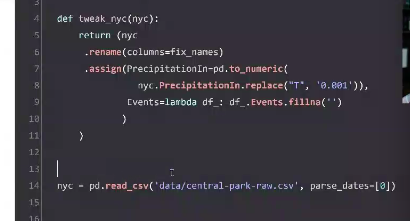

In [0]:
%%timeit
nyc.PrecipitationIn.map(to_cm)

1000 loops, best of 3: 870 µs per loop


In [0]:
%%timeit
nyc.PrecipitationIn.transform(to_cm)

1000 loops, best of 3: 917 µs per loop


In [0]:
%%timeit
nyc.PrecipitationIn*2.54

10000 loops, best of 3: 136 µs per loop


In [0]:
# can add and drop columns (axis=1 means along the columns axis)
# Note that we can access some columns with attribute access
# We can only set w/ attribute access on an existing column!
nyc['State'] = 'NYC'
nyc = nyc.drop(['State'], axis=1)
nyc

,EST,Max_TemperatureF,Mean_TemperatureF,Min_TemperatureF,Max_Dew_PointF,MeanDew_PointF,Min_DewpointF,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressureIn,Mean_Sea_Level_PressureIn,Min_Sea_Level_PressureIn,Max_VisibilityMiles,Mean_VisibilityMiles,Min_VisibilityMiles,Max_Wind_SpeedMPH,Mean_Wind_SpeedMPH,Max_Gust_SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2006-01-01,42.0,37.0,32.0,32.0,30.0,28.0,85.0,74.0,62.0,30.20,30.03,29.83,10.0,10.0,8.0,9.0,3.0,10.0,0.00,8.0,,276.0
1,2006-01-02,48.0,44.0,39.0,38.0,34.0,29.0,92.0,71.0,49.0,30.24,30.15,29.93,10.0,8.0,4.0,18.0,5.0,24.0,0.63,5.0,Rain,76.0
2,2006-01-03,40.0,37.0,33.0,38.0,33.0,26.0,92.0,84.0,75.0,30.05,29.93,29.83,10.0,7.0,2.0,28.0,15.0,41.0,1.13,8.0,Rain,39.0
3,2006-01-04,38.0,34.0,29.0,36.0,26.0,19.0,85.0,72.0,59.0,30.09,29.96,29.79,10.0,10.0,4.0,15.0,7.0,20.0,0.00,3.0,,70.0
4,2006-01-05,50.0,44.0,37.0,38.0,35.0,32.0,92.0,71.0,50.0,29.81,29.71,29.63,10.0,6.0,2.0,15.0,5.0,21.0,0.05,6.0,Rain,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2014-12-27,55.0,50.0,44.0,35.0,31.0,29.0,53.0,47.0,41.0,30.27,30.19,30.07,10.0,10.0,10.0,14.0,4.0,25.0,0.00,0.0,,257.0
3283,2014-12-28,54.0,49.0,43.0,43.0,37.0,26.0,92.0,73.0,53.0,30.07,29.95,29.88,10.0,9.0,2.0,15.0,6.0,22.0,0.10,5.0,Rain,264.0
3284,2014-12-29,44.0,39.0,34.0,25.0,19.0,15.0,53.0,42.0,31.0,30.26,30.18,30.09,10.0,10.0,10.0,15.0,5.0,25.0,0.00,0.0,,308.0
3285,2014-12-30,34.0,31.0,28.0,17.0,13.0,8.0,58.0,47.0,36.0,30.40,30.36,30.27,10.0,10.0,10.0,10.0,4.0,17.0,0.00,2.0,,5.0


In [0]:
# can use pd.to_datetime to convert a column to a datetime
date_str = nyc.EST.astype(str)
pd.to_datetime(date_str)

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
3282   2014-12-27
3283   2014-12-28
3284   2014-12-29
3285   2014-12-30
3286   2014-12-31
Name: EST, Length: 3287, dtype: datetime64[ns]

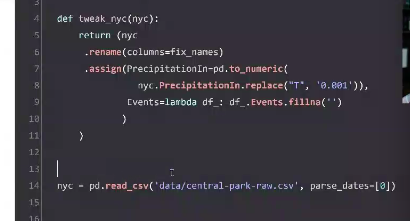

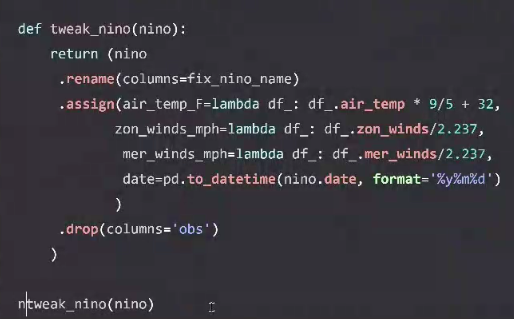

## Tweak Data Assignment
With the nino dataset:
* Replace the periods and spaces in the column names with underscores
* The temperatures are stored as Celsius. Create a new column, ``air_temp_F``, using Fahrenheit
  (Tf = Tc*9/5 + 32)
* The wind speed is in meters per second. Create new columns,  adding ``_mph``, that uses miles per hour ( 1 MPS = 2.237 MPH )
* Convert the ``date`` column to a date type.
* Drop the obs column

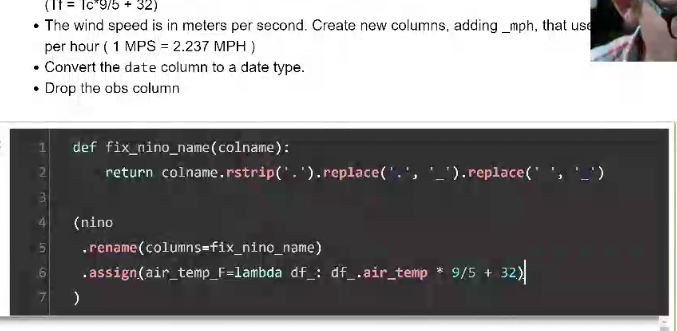

In [0]:
nino.dtypes

year_month_day    datetime64[ns]
obs                        int64
date                       int64
latitude                 float64
longitude                float64
zon.winds                float64
mer.winds                float64
humidity                 float64
air temp.                float64
s.s.temp.                float64
dtype: object